### The Intriguing World of Social Media Surveillance

Social media surveillance is a hot topic in today's digital age. With the vast amount of data generated every second, understanding the trends, patterns, and implications of this surveillance is crucial. This dataset from Kaggle provides a fascinating glimpse into the academic research surrounding social media surveillance. Let's dive in and see what insights we can uncover. If you find this notebook useful, please upvote it.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
file_path = '/kaggle/input/social-media-surveillance/960scopus.csv'
df = pd.read_csv(file_path)
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Batra K.; Batra R.; Sharma M.,"Batra, Kavita (57219649874); Batra, Ravi (5722...",57219649874; 57220211375; 55468811500,Social media and Infodemiology—use of social m...,2023,Effective Use of Social Media in Public Health,NaN,NaN,NaN,253,...,978-032395630-7; 978-032395631-4,NaN,NaN,English,Effective Use of Social Media in Public Health,Book chapter,Final,NaN,Scopus,2-s2.0-85163495989
1,Sun K.; Wang D.; Xiao X.,"Sun, Kunpeng (57214880845); Wang, Dan (5721646...",57214880845; 57216463554; 36717197200,Another victory of retail investors: Social me...,2022,International Review of Financial Analysis,82,NaN,102181,NaN,...,NaN,NaN,NaN,English,Int. Rev. Financ. Anal.,Article,Final,NaN,Scopus,2-s2.0-85129768257
2,Fuller J.L.; Strehlow H.V.; Schmidt J.O.; Bodi...,"Fuller, Jessica L (57833109600); Strehlow, Har...",57833109600; 36640738000; 23036587200; 1310366...,Tracking integrated ecosystem assessments in t...,2023,ICES Journal of Marine Science,80,2,NaN,282,...,NaN,ICESE,NaN,English,ICES J. Mar. Sci.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85152120510
3,Wang S.; Ning H.; Huang X.; Xiao Y.; Zhang M.;...,"Wang, Siqin (57203764294); Ning, Huan (5720394...",57203764294; 57203944565; 57201292422; 5719523...,Public Surveillance of Social Media for Suicid...,2023,Journal of Medical Internet Research,25,NaN,e47225,NaN,...,NaN,NaN,37267022.0,English,J. Med. Internet Res.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85160967472
4,Cai Y.; Liu L.; Li Z.,"Cai, Yantao (58482515700); Liu, Liu (555727587...",58482515700; 55572758700; 56298593400,Modelling and monitoring social network change...,2023,Journal of Applied Statistics,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,J. Appl. Stat.,Article,Article in press,NaN,Scopus,2-s2.0-85164454847


### Data Overview

Let's take a closer look at the structure of our dataset and understand the types of data we are dealing with.

In [2]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        954 non-null    object 
 1   Author full names              954 non-null    object 
 2   Author(s) ID                   954 non-null    object 
 3   Title                          960 non-null    object 
 4   Year                           960 non-null    int64  
 5   Source title                   959 non-null    object 
 6   Volume                         675 non-null    object 
 7   Issue                          409 non-null    object 
 8   Art. No.                       283 non-null    object 
 9   Page start                     732 non-null    object 
 10  Page end                       710 non-null    object 
 11  Page count                     717 non-null    float64
 12  Cited by                       960 non-null    int

### Data Cleaning and Preprocessing

Before diving into the analysis, we need to clean and preprocess the data. This includes handling missing values, converting data types, and extracting relevant features.

In [3]:
# Handling missing values
df = df.dropna(subset=['Title', 'Year', 'Cited by', 'Link', 'Abstract', 'Language of Original Document', 'Document Type', 'Publication Stage', 'Source', 'EID'])

# Converting data types
df['Year'] = df['Year'].astype(int)
df['Cited by'] = df['Cited by'].astype(int)

# Displaying the cleaned dataset
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Batra K.; Batra R.; Sharma M.,"Batra, Kavita (57219649874); Batra, Ravi (5722...",57219649874; 57220211375; 55468811500,Social media and Infodemiology—use of social m...,2023,Effective Use of Social Media in Public Health,NaN,NaN,NaN,253,...,978-032395630-7; 978-032395631-4,NaN,NaN,English,Effective Use of Social Media in Public Health,Book chapter,Final,NaN,Scopus,2-s2.0-85163495989
1,Sun K.; Wang D.; Xiao X.,"Sun, Kunpeng (57214880845); Wang, Dan (5721646...",57214880845; 57216463554; 36717197200,Another victory of retail investors: Social me...,2022,International Review of Financial Analysis,82,NaN,102181,NaN,...,NaN,NaN,NaN,English,Int. Rev. Financ. Anal.,Article,Final,NaN,Scopus,2-s2.0-85129768257
2,Fuller J.L.; Strehlow H.V.; Schmidt J.O.; Bodi...,"Fuller, Jessica L (57833109600); Strehlow, Har...",57833109600; 36640738000; 23036587200; 1310366...,Tracking integrated ecosystem assessments in t...,2023,ICES Journal of Marine Science,80,2,NaN,282,...,NaN,ICESE,NaN,English,ICES J. Mar. Sci.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85152120510
3,Wang S.; Ning H.; Huang X.; Xiao Y.; Zhang M.;...,"Wang, Siqin (57203764294); Ning, Huan (5720394...",57203764294; 57203944565; 57201292422; 5719523...,Public Surveillance of Social Media for Suicid...,2023,Journal of Medical Internet Research,25,NaN,e47225,NaN,...,NaN,NaN,37267022.0,English,J. Med. Internet Res.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85160967472
4,Cai Y.; Liu L.; Li Z.,"Cai, Yantao (58482515700); Liu, Liu (555727587...",58482515700; 55572758700; 56298593400,Modelling and monitoring social network change...,2023,Journal of Applied Statistics,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,J. Appl. Stat.,Article,Article in press,NaN,Scopus,2-s2.0-85164454847


### Exploratory Data Analysis (EDA)

Let's explore the dataset to uncover interesting patterns and trends. We'll start with some basic visualizations.

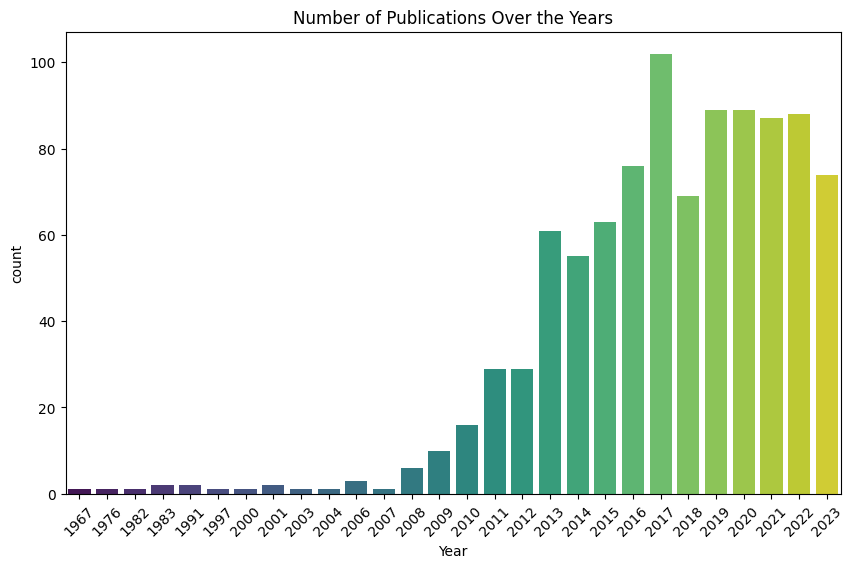

In [4]:
# Distribution of publications over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Number of Publications Over the Years')
plt.xticks(rotation=45)
plt.show()

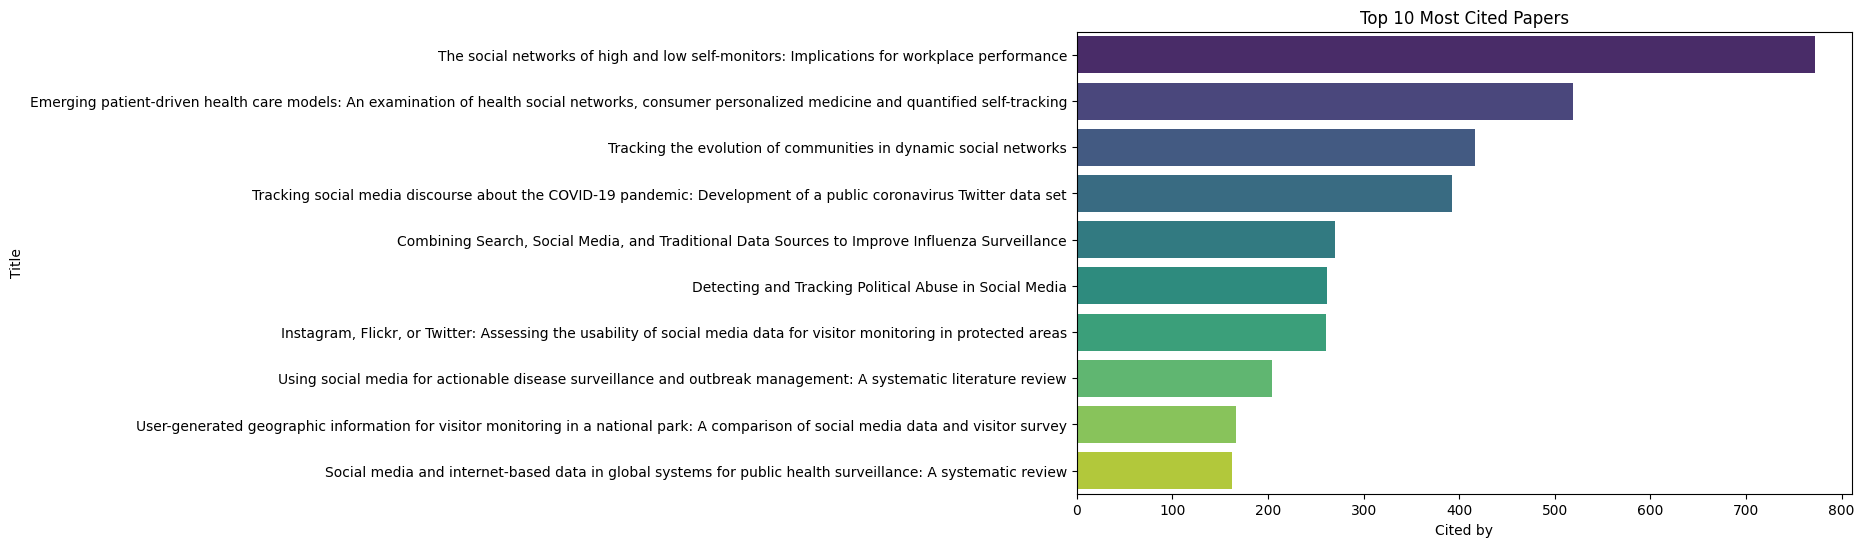

In [5]:
# Top 10 most cited papers
top_cited = df.nlargest(10, 'Cited by')
plt.figure(figsize=(10, 6))
sns.barplot(x='Cited by', y='Title', data=top_cited, palette='viridis')
plt.title('Top 10 Most Cited Papers')
plt.show()

### Correlation Analysis

Let's examine the correlation between numeric variables in the dataset.

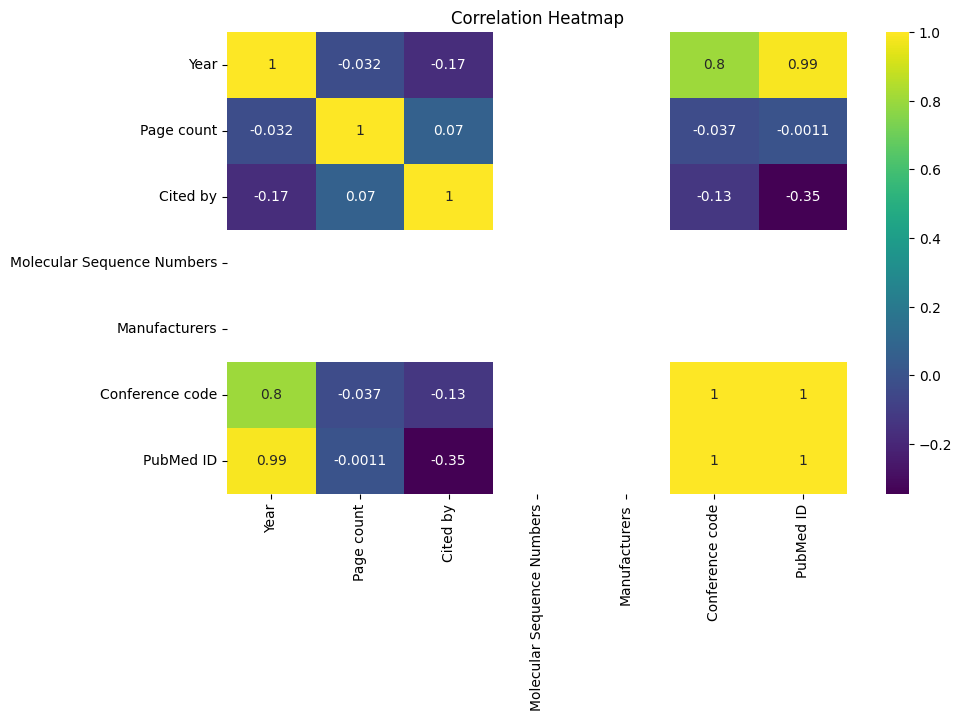

In [6]:
# Selecting numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

### Predictive Analysis

Given the data, it might be interesting to predict the number of citations a paper will receive based on its features. Let's build a simple linear regression model to predict the 'Cited by' count.

In [7]:
# Selecting features and target variable
X = df[['Year']]
y = df['Cited by']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(2264.2003742688594, -0.058295246767638975)

### Future Analysis

There are numerous directions we could take for further analysis. For instance, we could explore the impact of different document types on citation counts, or analyze the effect of open access on the number of citations. What do you think would be useful to explore next?

### Conclusion

In this notebook, we explored the fascinating dataset on social media surveillance, performed some exploratory data analysis, and built a simple predictive model. The insights gained here are just the tip of the iceberg. If you found this notebook useful, please upvote it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)